In [1]:
import numpy as np
import sys
import pandas as pd
#
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
# from collections import namedtuple

try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter 
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here

In [2]:
#Import gossip log and filter the messages received on grpc

fileHandle = open('/home/flav/gossip_data/log_gossip_rippled.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip_data/log_rippled_filter.out', 'w+') as f:
    for line in lines:
      if 'received' in line:
        print(line, file=f)
fileHandle.close()

In [5]:
# Create dataset for the gossip and correct the datetime
data = pd.read_csv('/home/flav/gossip_data/log_rippled_filter.out', sep="|", header=None, usecols=[0,2,5])
df = pd.DataFrame(data)

# df["hash"] = df[2].apply(hash)

print(df)

dups= df.pivot_table(columns=[5], aggfunc='size').sort_values(by=0, ascending=False)

                    0  2                                                  5
0     20211125_185722  7   62c754bfc14510299dc11f14c8556cd45e0bff3ea12be...
1     20211125_185726  7   23f72d80caa073672d34d47958e1c1d558968d5b33e12...
2     20211125_185729  7   62c754bfc14510299dc11f14c8556cd45e0bff3ea12be...
3     20211125_185740  2   b50ea8a3c8b24ea9ad9f8994494709d075467a01482d8...
4     20211125_185743  2   23f72d80caa073672d34d47958e1c1d558968d5b33e12...
...               ... ..                                                ...
8493  20211125_200513  8   2cf821fbae35875fefb4f7462583940b98804993b1643...
8494  20211125_200515  3   450110a6605d26aaa2ae30a526ab0d6e54767fd7e32fb...
8495  20211125_200515  6   450110a6605d26aaa2ae30a526ab0d6e54767fd7e32fb...
8496  20211125_200515  5   2cf821fbae35875fefb4f7462583940b98804993b1643...
8497  20211125_200515  4   2cf821fbae35875fefb4f7462583940b98804993b1643...

[8498 rows x 3 columns]


TypeError: sort_values() got an unexpected keyword argument 'by'

In [3]:

# dups = dups.sort_values(ascending=False)
avg = np.mean(dups)
max = np.max(dups)
print(dups)
print(max)

                    0  2                                                  5
0     20211125_185722  7   62c754bfc14510299dc11f14c8556cd45e0bff3ea12be...
1     20211125_185726  7   23f72d80caa073672d34d47958e1c1d558968d5b33e12...
2     20211125_185729  7   62c754bfc14510299dc11f14c8556cd45e0bff3ea12be...
3     20211125_185740  2   b50ea8a3c8b24ea9ad9f8994494709d075467a01482d8...
4     20211125_185743  2   23f72d80caa073672d34d47958e1c1d558968d5b33e12...
...               ... ..                                                ...
8493  20211125_200513  8   2cf821fbae35875fefb4f7462583940b98804993b1643...
8494  20211125_200515  3   450110a6605d26aaa2ae30a526ab0d6e54767fd7e32fb...
8495  20211125_200515  6   450110a6605d26aaa2ae30a526ab0d6e54767fd7e32fb...
8496  20211125_200515  5   2cf821fbae35875fefb4f7462583940b98804993b1643...
8497  20211125_200515  4   2cf821fbae35875fefb4f7462583940b98804993b1643...

[8498 rows x 3 columns]
5
 e475e3f3cd6bddbd0cf428b0466d6fefe356546c844b6733d1405cd8c198

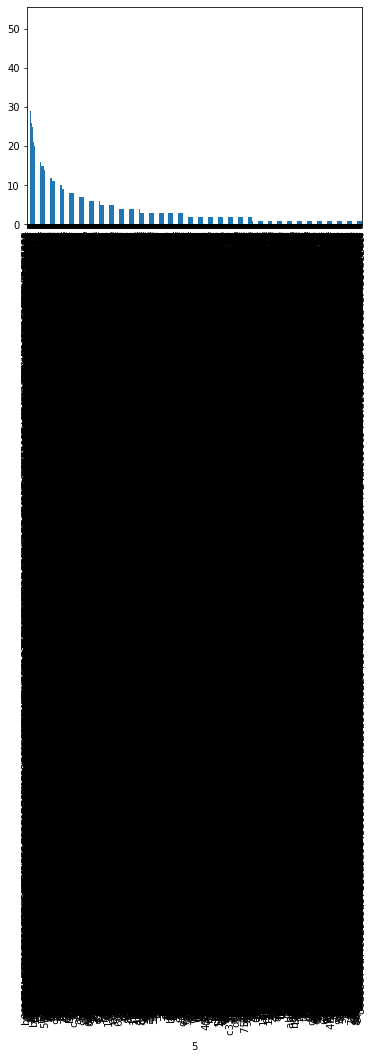

In [4]:
dups.plot(kind='bar')

In [12]:
#Is rippled sending dupicated messages to grpc?

#Import gossip log and filter the messages received on grpc

fileHandle = open('/home/flav/gossip_data/log_gossip_rippled_send.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip_data/log_rippled_filter_sent.out', 'w+') as f:
    for line in lines:
      if 'message sent' in line:
        print(line[:-2].replace("	", ""), file=f)
fileHandle.close()

In [13]:
_# Create dataset for the gossip and correct the datetime
data = pd.read_csv('/home/flav/gossip_data/log_rippled_filter_sent.out', sep="|", header=None)#, usecols=[0,2,3])
df = pd.DataFrame(data)

df["hash"] = df[2].apply(hash)

print(df)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 583, saw 7
